## COVID-19 Daily Analysis Table and Heat Map 
  - source:  Stats Evolution per Coutry, John Hopkins,  https://github.com/CSSEGISandData/
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19

In [37]:
# WARNING ON COUNTRIES BY LAST DAY DEATH  |  ALERTS for the range Thousand / Day group
df9.transpose().tail(1) 

Country/Region,US,France,United Kingdom,Spain,Italy,Belgium,Germany,Iran,Netherlands,Brazil,Turkey,Sweden,Switzerland
4/10/20,2108,987,980,634,570,496,160,122,115,107,98,77,54


### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [1]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 48.5 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 34.1 MB/s eta 0:00:01    |███████                         | 4.4 MB 34.1 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 36.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 47.6 MB/s eta 0:00:01     |█████████████████▋              | 14.4 MB 47.6 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 10.9 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 7.9 MB/s  eta 0:00:01


In [2]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1745      0 --:--:-- --:--:-- --:--:--  1760
100 52985  100 52985    0     0   214k      0 --:--:-- --:--:-- --:--:--  214k


In [3]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [4]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df[cols20] )

,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
Country/Region,,,,,,,,,,,,,
Algeria,31,35,44,58,86,105,130,152,173,193,205,235,256
Austria,86,108,128,146,158,168,186,204,220,243,273,295,319
Belgium,431,513,705,828,1011,1143,1283,1447,1632,2035,2240,2523,3019
Brazil,136,159,201,240,324,359,445,486,564,686,819,950,1057
Canada,21,31,33,37,53,67,94,119,150,153,153,200,222
Canada,22,22,31,33,36,61,61,75,121,150,175,216,241
China,3182,3186,3187,3193,3199,3203,3207,3210,3212,3212,3213,3215,3216
Czechia,16,23,31,39,44,53,59,67,78,88,99,112,119
Denmark,72,77,90,104,123,139,161,179,187,203,218,237,247


In [5]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [6]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(13)
display(df9) 

,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
Country/Region,,,,,,,,,,,,
US,511,895,884,1169,1161,1320,1212,1164,1939,1973,1783,2108
France,418,499,509,1355,1120,1053,518,833,1417,541,1341,987
United Kingdom,180,381,563,569,684,708,621,439,786,938,881,980
Spain,913,748,923,961,850,749,694,700,704,747,655,634
Italy,812,837,727,760,766,681,525,636,604,542,610,570
Belgium,82,192,123,183,132,140,164,185,403,205,283,496
Germany,112,130,145,187,168,169,140,226,206,333,258,160
Iran,117,141,138,124,134,158,151,136,133,121,117,122
Netherlands,93,175,134,166,148,164,115,101,234,147,148,115


In [7]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
511,895,884,1169,1161,1320,1212,1164,1939,1973,1783,2108"
data-datasets="418,499,509,1355,1120,1053,518,833,1417,541,1341,987"
data-datasets="180,381,563,569,684,708,621,439,786,938,881,980"
data-datasets="913,748,923,961,850,749,694,700,704,747,655,634"
data-datasets="812,837,727,760,766,681,525,636,604,542,610,570"
data-datasets="82,192,123,183,132,140,164,185,403,205,283,496"
data-datasets="112,130,145,187,168,169,140,226,206,333,258,160"
data-datasets="117,141,138,124,134,158,151,136,133,121,117,122"
data-datasets="93,175,134,166,148,164,115,101,234,147,148,115"
data-datasets="23,42,39,84,35,86,41,78,122,133,131,107"
data-datasets="37,46,63,79,69,76,73,75,76,87,96,98"
data-datasets="36,34,59,69,50,15,28,76,114,96,106,77"
data-datasets="59,74,55,48,55,75,49,50,56,74,53,54


In [8]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Algeria,Austria,Belgium,Brazil,Canada,Canada,China,Czechia,Denmark,Dominican Republic,...,Philippines,Poland,Portugal,Romania,Spain,Sweden,Switzerland,Turkey,United Kingdom,US
3/30/20,4,22,82,23,10,0,4,7,5,3,...,7,9,21,22,913,36,59,37,180,511
3/31/20,9,20,192,42,2,9,1,8,13,9,...,10,2,20,17,748,34,74,46,381,895
4/1/20,14,18,123,39,4,2,6,8,14,6,...,8,10,27,10,923,59,55,63,563,884
4/2/20,28,12,183,84,16,3,6,5,19,3,...,11,14,22,23,961,69,48,79,569,1169
4/3/20,19,10,132,35,14,25,4,9,16,8,...,29,14,37,18,850,50,55,69,684,1161
4/4/20,25,18,140,86,27,0,4,6,22,0,...,8,8,20,13,749,15,75,76,708,1320
4/5/20,22,18,164,41,25,14,3,8,18,14,...,8,15,29,5,694,28,49,73,621,1212
4/6/20,21,16,185,78,31,46,2,11,8,4,...,11,13,16,25,700,76,50,75,439,1164
4/7/20,20,23,403,122,3,29,0,10,16,12,...,14,22,34,21,704,114,56,76,786,1939
4/8/20,12,30,205,133,0,25,1,11,15,10,...,5,30,35,23,747,96,74,87,938,1973


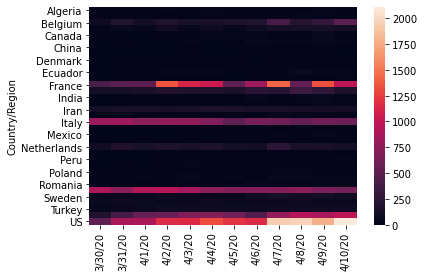

In [9]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

35 19.416666666666668


Country/Region
Algeria               1.2
Austria               1.2
Belgium               1.3
Brazil                1.2
Canada                2.0
Canada                0.9
China                 1.5
Czechia               1.0
Denmark               1.2
Dominican Republic    1.1
Ecuador               5.0
Egypt                 2.0
France                1.0
Germany               1.0
India                 1.3
Indonesia             2.9
Iran                  0.9
Ireland               1.0
Italy                 1.0
Korea, South          0.9
Mexico                1.2
Morocco               0.7
Netherlands           0.8
Norway                0.7
Peru                  2.0
Philippines           1.6
Poland                0.6
Portugal              1.1
Romania               1.1
Spain                 0.9
Sweden                1.0
Switzerland           1.0
Turkey                1.3
United Kingdom        1.5
US                    1.3
dtype: float64

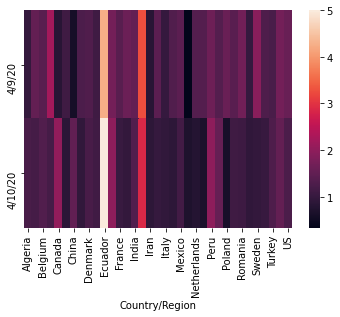

In [10]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [11]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/10/20
Country/Region,
Peru,2.351724
Belgium,2.177175
Egypt,1.989362
Indonesia,1.554348
Morocco,1.486486
US,1.485648
United Kingdom,1.427815
Philippines,1.384615
Brazil,1.310690


In [12]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)